In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt


In [2]:
n = pn.PointData()
n['a'] = np.arange(100)
n['b'] = np.arange(200).reshape(100,2)

In [73]:
g = pn.GridData()

In [74]:
g['a'] = np.arange(10)

adding default grid


In [75]:
np.array2string(np.array(10.64374637864378463278), precision=2)

'10.64'

In [76]:
g.grid

Grid(
Dimension("x",
points = None,
edges = array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
nbins = 10),)

In [77]:
g['b'] = np.arange(30).reshape(10,-1)

In [78]:
g

x,"[0, 1]","[1, 2]","[2, 3]","[3, 4]","[4, 5]","[5, 6]","[6, 7]","[7, 8]","[8, 9]","[9, 10]"
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [79]:
g.flat('b')

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [80]:
g.grid.size

10

In [81]:
g

x,"[0, 1]","[1, 2]","[2, 3]","[3, 4]","[4, 5]","[5, 6]","[6, 7]","[7, 8]","[8, 9]","[9, 10]"
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [11]:
g.grid.dims.items()

odict_items([('x', Dimension("x",
points = None,
edges = array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
nbins = 10))])

In [12]:
g['b'].ndim

2

In [13]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')
bw = np.average(img, axis=-1)

In [14]:
g = pn.GridData()

In [15]:
g['bw'] = bw.T[:,::-1] / 255.
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [16]:
g.grid.vars

['x', 'y']

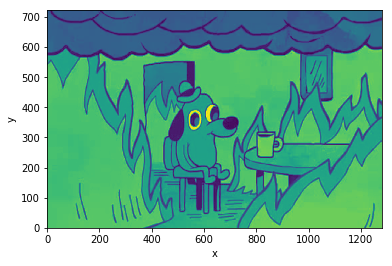

In [17]:
g.plot('bw')

In [20]:
g['img'].ndim

3

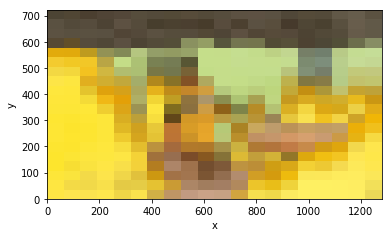

In [21]:
g.binwise(function=np.mean, x=20, y=20).plot('img')

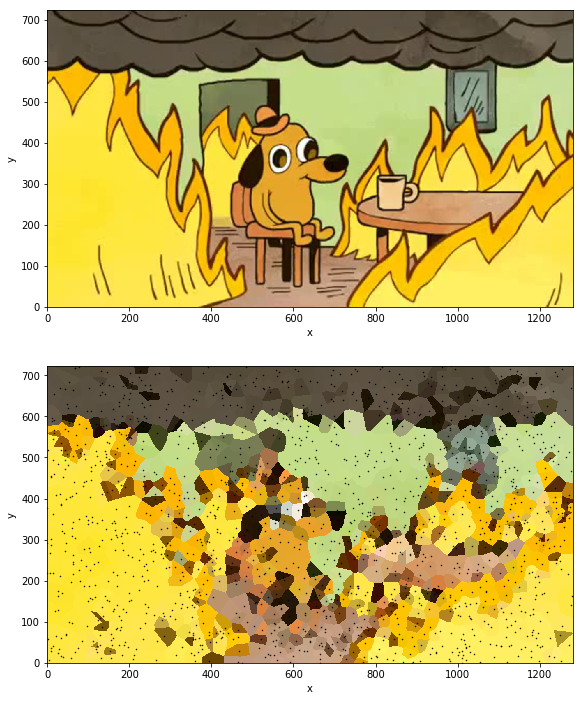

In [22]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges[-1], y=np.random.rand(N)*g.grid['y'].edges[-1])
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='k', ax=ax[1], ms=1)

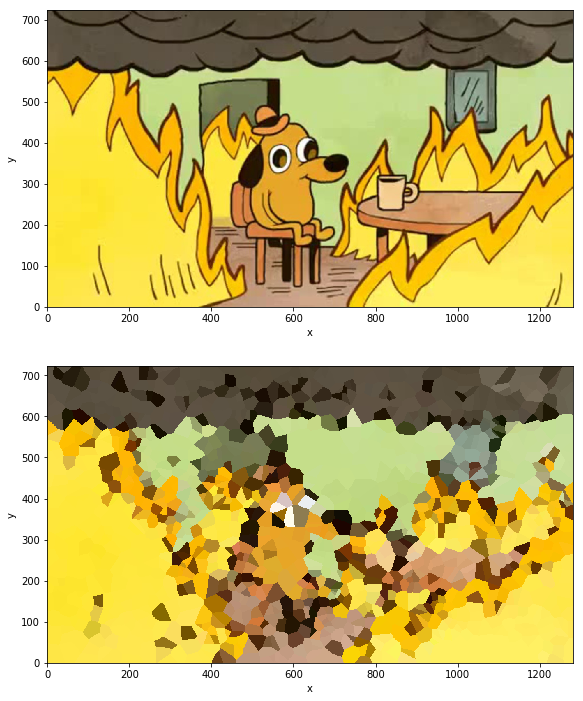

In [23]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges[-1]
pd['y'] = np.random.rand(N)*g.grid['y'].edges[-1]
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

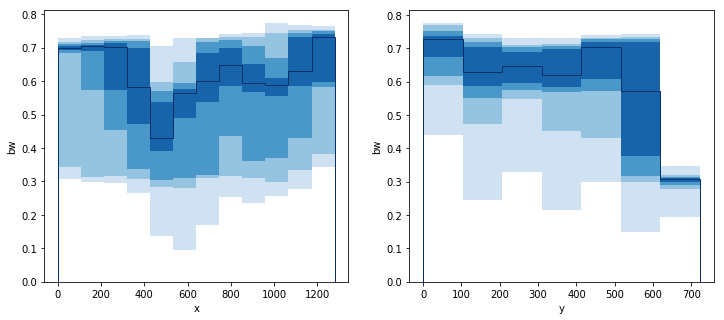

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

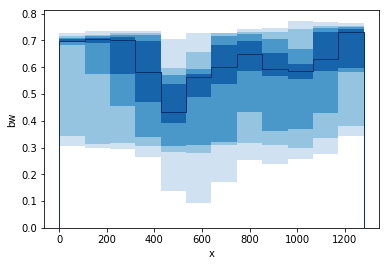

In [26]:
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')

In [27]:
g['img'].shape

(1280, 722, 3)

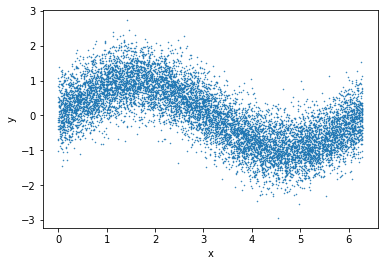

In [35]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(len(p)) * 0.5
p.plot('.', ms=1)

In [36]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

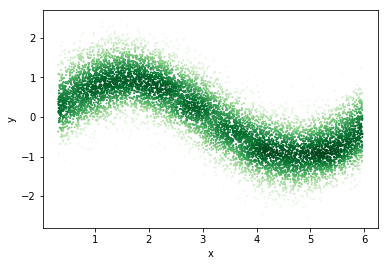

In [37]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

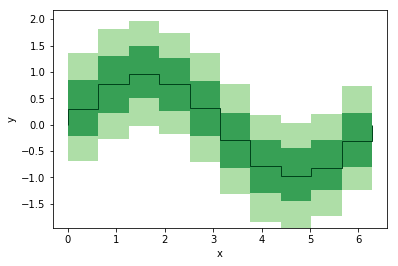

In [38]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

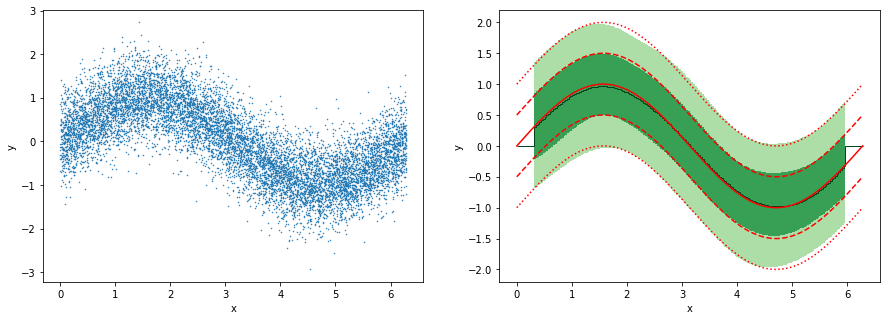

In [39]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='cubic').plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

get item 0
get item 0


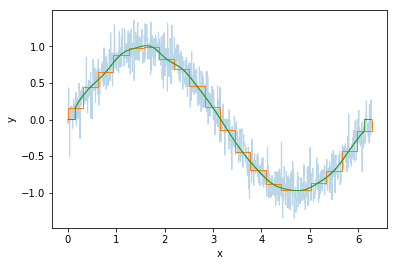

In [40]:
p.binwise(method='mean', x=1000).plot('y', alpha=0.3)
p.binwise(method='mean', x=20).plot('y')
p.binwise(method='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [56]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

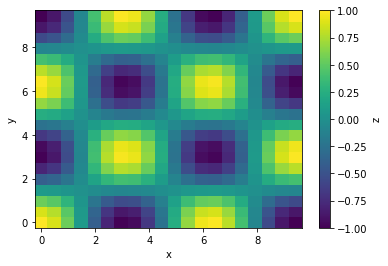

In [57]:
s.plot(cbar=True)

In [58]:
s

y \ x,0.00,0.50,0.99,1.49,1.98,2.48,2.98,3.47,3.97,4.46,4.96,5.46,5.95,6.45,6.94,7.44,7.94,8.43,8.93,9.42
0.00,z: 1.00,z: 0.88,z: 0.55,z: 0.08,z: -0.40,z: -0.79,z: -0.99,z: -0.95,z: -0.68,z: -0.25,z: 0.25,z: 0.68,z: 0.95,z: 0.99,z: 0.79,z: 0.40,z: -0.08,z: -0.55,z: -0.88,z: -1.00
0.50,z: 0.88,z: 0.77,z: 0.48,z: 0.07,z: -0.35,z: -0.69,z: -0.87,z: -0.83,z: -0.60,z: -0.22,z: 0.22,z: 0.60,z: 0.83,z: 0.87,z: 0.69,z: 0.35,z: -0.07,z: -0.48,z: -0.77,z: -0.88
0.99,z: 0.55,z: 0.48,z: 0.30,z: 0.05,z: -0.22,z: -0.43,z: -0.54,z: -0.52,z: -0.37,z: -0.13,z: 0.13,z: 0.37,z: 0.52,z: 0.54,z: 0.43,z: 0.22,z: -0.05,z: -0.30,z: -0.48,z: -0.55
1.49,z: 0.08,z: 0.07,z: 0.05,z: 0.01,z: -0.03,z: -0.07,z: -0.08,z: -0.08,z: -0.06,z: -0.02,z: 0.02,z: 0.06,z: 0.08,z: 0.08,z: 0.07,z: 0.03,z: -0.01,z: -0.05,z: -0.07,z: -0.08
1.98,z: -0.40,z: -0.35,z: -0.22,z: -0.03,z: 0.16,z: 0.32,z: 0.40,z: 0.38,z: 0.27,z: 0.10,z: -0.10,z: -0.27,z: -0.38,z: -0.40,z: -0.32,z: -0.16,z: 0.03,z: 0.22,z: 0.35,z: 0.40
2.48,z: -0.79,z: -0.69,z: -0.43,z: -0.07,z: 0.32,z: 0.62,z: 0.78,z: 0.75,z: 0.53,z: 0.19,z: -0.19,z: -0.53,z: -0.75,z: -0.78,z: -0.62,z: -0.32,z: 0.07,z: 0.43,z: 0.69,z: 0.79
2.98,z: -0.99,z: -0.87,z: -0.54,z: -0.08,z: 0.40,z: 0.78,z: 0.97,z: 0.93,z: 0.67,z: 0.24,z: -0.24,z: -0.67,z: -0.93,z: -0.97,z: -0.78,z: -0.40,z: 0.08,z: 0.54,z: 0.87,z: 0.99
3.47,z: -0.95,z: -0.83,z: -0.52,z: -0.08,z: 0.38,z: 0.75,z: 0.93,z: 0.89,z: 0.64,z: 0.23,z: -0.23,z: -0.64,z: -0.89,z: -0.93,z: -0.75,z: -0.38,z: 0.08,z: 0.52,z: 0.83,z: 0.95
3.97,z: -0.68,z: -0.60,z: -0.37,z: -0.06,z: 0.27,z: 0.53,z: 0.67,z: 0.64,z: 0.46,z: 0.17,z: -0.17,z: -0.46,z: -0.64,z: -0.67,z: -0.53,z: -0.27,z: 0.06,z: 0.37,z: 0.60,z: 0.68
4.46,z: -0.25,z: -0.22,z: -0.13,z: -0.02,z: 0.10,z: 0.19,z: 0.24,z: 0.23,z: 0.17,z: 0.06,z: -0.06,z: -0.17,z: -0.23,z: -0.24,z: -0.19,z: -0.10,z: 0.02,z: 0.13,z: 0.22,z: 0.25


In [55]:
s.grid.shape 

(100, 100)